# What is a **signal**?

A **signal** is a *variation* in a certain quantity over time. For audio, the quantity that varies is **air pressure**. 

### How do we capture this information digitally? 
We can take samples of the air pressure over time.  The rate at which we sample the data can vary, but is most commonly 44.1kHz, or 44,100 samples per second. 
What we have captured is a *waveform* for the signal, and this can be interpreted, modified, and analyzed with computer software.

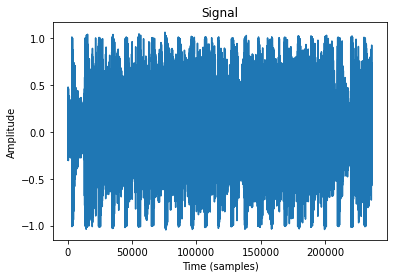

In [52]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

y, sr = librosa.load('/Users/the_redd_/Downloads/hands.wav')
plt.plot(y);
plt.title('Signal');
plt.xlabel('Time (samples)');
plt.ylabel('Amplitude');

Audio(data=y, rate=sr)


This is great! We have a digital representation of an audio signal that we can work with. Welcome to the field of signal processing! You may be wondering though, how do we extract useful information from this? It looks like a jumbled mess. This is where our friend **Fourier** comes in.

## The Fourier Transform 

**Spectral data** is displayed in the *frequency domain* while **waveform data** is in the *time domain*. 
Both spectral and waveform data have unique advantages when used in analysis. For simple analysis where a single frequency is present in the data, either form of data can be used. Unfortunately most data is not as simple to analyze. Usually noise is present in the data, and multiple frequencies may be present. This makes it difficult to extract useful information from the waveform, and spectral data can be better for analysis.

An audio signal is comprised of several single-frequency sound waves. When taking samples of the signal over time, we only capture the resulting amplitudes. The **Fourier transform** is a mathematical formula that allows us to decompose a signal into it’s individual frequencies and the frequency’s amplitude. In other words, it converts the signal from the time domain into the frequency domain. The result is called a **spectrum**.

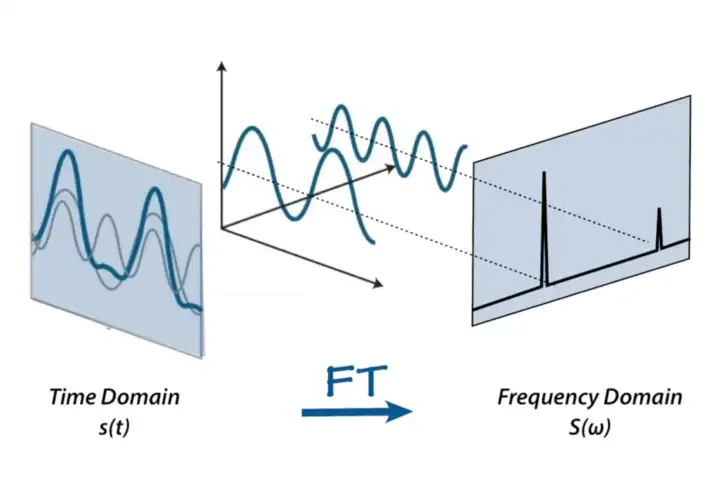

In [53]:
from IPython import display
display.Image("/Users/the_redd_/Downloads/ima.png")

This is possible because every signal can be decomposed into a set of sine and cosine waves that add up to the original signal. This is a remarkable theorem known as Fourier’s theorem. The **fast Fourier transform** (**FFT**) is an algorithm that can efficiently compute the Fourier transform. It is widely used in signal processing.

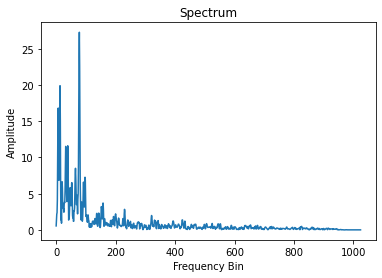

In [54]:
import numpy as np
n_fft = 2048
ft = np.abs(librosa.stft(y[:n_fft], hop_length = n_fft+1))
plt.plot(ft);
plt.title('Spectrum');
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');

### Pay attention:
The Fourier transform is a powerful tool for creating spectral data. It decomposes the time domain information that contains multiple frequencies; however, **any random or non-periodic impacts will be ignored** with this method and they will not show up in the spectrum. The **crest factor** of a waveform can be calculated in the time domain and it helps determine if any impacting is occurring, and its severity. This demonstrates why it is important to view both spectral and waveform information when analyzing data.

## The Spectrogram

The fast Fourier transform is a powerful tool that allows us to analyze the frequency content of a signal, but like with most audio signals such as music and speech, our signal’s frequency content varies over time. These signals are known as non **periodic signals**. We need a way to represent the spectrum of these signals as they vary over time. You may be thinking, “hey, can’t we compute several spectrums by performing FFT on several windowed segments of the signal?” Yes! This is exactly what is done, and it is called the **short-time Fourier transform**. The **FFT** is computed on overlapping windowed segments of the signal, and we get what is called the **spectrogram**. 


You can think of a spectrogram as a bunch of FFTs stacked on top of each other. It is a way to visually represent a signal’s loudness, or amplitude, as it varies over time at different frequencies. There are some additional details going on behind the scenes when computing the spectrogram. The y-axis is converted to a log scale, and the color dimension is converted to decibels (you can think of this as the log scale of the amplitude). This is because humans can only perceive a very small and concentrated range of frequencies and amplitudes.

**How should we "read" the spectogram?**

In the spectrogram view, the vertical axis displays frequency in Hertz, the horizontal axis represents time (just like the waveform display), and amplitude is represented by brightness.
The black background is silence, while the bright orange curve is the sine wave moving up in pitch. This allows us to view a range of frequencies (lowest at the bottom of the display, highest at the top) and how loud events at different frequencies are. Loud events will appear bright and quiet events will appear dark.

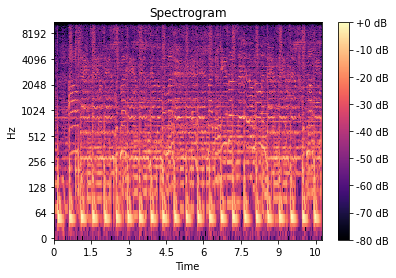

In [55]:
spec = np.abs(librosa.stft(y, hop_length=512))
spec = librosa.amplitude_to_db(spec, ref=np.max)
librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram');

We have a solid grasp on the “spectrogram” part, but what about “Mel.” Who is he?

## The Mel Scale

Studies have shown that humans do not perceive frequencies on a linear scale. We are better at detecting differences in lower frequencies than higher frequencies. For example, we can easily tell the difference between 500 and 1000 Hz, but we will hardly be able to tell a difference between 10,000 and 10,500 Hz, even though the distance between the two pairs are the same. 

In 1937, Stevens, Volkmann, and Newmann proposed a unit of pitch such that equal distances in pitch sounded equally distant to the listener. This is called the **Mel Scale**. We perform a mathematical operation (logarithm) on frequencies to convert them to the mel scale.

The transformation from the Hertz scale to the Mel Scale is the following:
$$ m = 1127 \cdot log( 1 + \frac{f}{700})$$
**Note** that log in this case refers to the natural logarithm (also denoted as ln.) If the logarithm were of base 10, the equation’s coefficient (1127) would alter slightly.

A **Mel Spectrogram** is a spectrogram where the frequencies are converted to the mel scale.

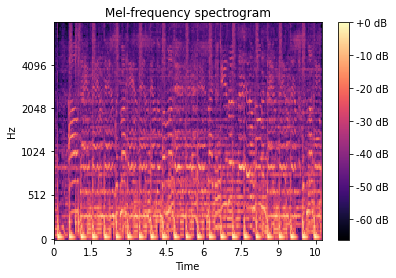

In [56]:
# Passing through arguments to the Mel filters
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,
                                    fmax=8000)

fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')
plt.show()

# In Summary

1. We took samples of air pressure over time to digitally represent an **audio signal**

2. We mapped the audio signal from the time domain to the frequency domain using the **fast Fourier transform**, and we performed this on overlapping windowed segments of the audio signal.

3. We converted the y-axis (frequency) to a log scale and the color dimension (amplitude) to decibels to form the **spectrogram**.

4. We mapped the y-axis (frequency) onto the **mel scale** to form the **mel spectrogram**.

5. In audio software, we’re accustomed to seeing a waveform that displays changes in a signal’s amplitude over time. A spectrogram, however, displays changes in the frequencies in a signal over time. Amplitude is then represented on a third dimension with variable brightness or color (?)
